In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def createProgressPlot(density, dataset_suffix, num_rows=None, start_rows=0, ax=None, batch=False):
    
    filename = "../results/compiled_results/progress_dataset_1x1_50_{}_{}.txt".format(
        density, dataset_suffix)
    
    try:
        df = pd.read_csv(filename, delimiter=" ", header=None)
    except:
        return

    df.columns = ["Time",
                  "Traffic Lights",
                  "Virtual Traffic Lights",
                  "Clique-Based Traffic Controller",
                  "Modified MTC"]

    df.drop(columns=["Modified MTC"], inplace=True)
    
    if num_rows != None:
        df = df.iloc[start_rows:num_rows]
    
    if ax is None:
        ax = df.set_index("Time").plot(figsize=(7, 5))
    else:
        df.set_index("Time").plot(ax=ax)
    
    title = "Progress of Traffic Controller Simulations with\nTraffic Density of {} Cars per Minute".format(
        int(density))

    ax.set_title(title)
    ax.set_xlabel("Time (minutes)")
    ax.set_ylabel("Successful Cars")

    if not batch:
        savefile = "plots/progress_plot_1x1_50_{}_{}.pdf".format(density, dataset_suffix)
        plt.savefig(savefile)

def progressTestSuite(dataset_suffix, num_rows=None, start_rows=0):
    
    fig, axes = plt.subplots(5, 3, figsize=(14, 14))
    
    for i in range(15):
        x = i % 3
        y = i // 3
        density = "{:03}".format((i+1)*10)
        createProgressPlot(density, dataset_suffix, num_rows, start_rows, axes[y][x], True)


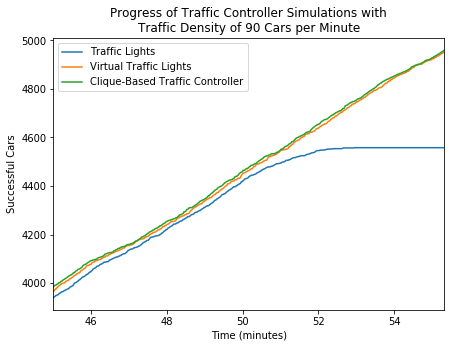

In [2]:
createProgressPlot("090", "111_00", 3320, 2700)

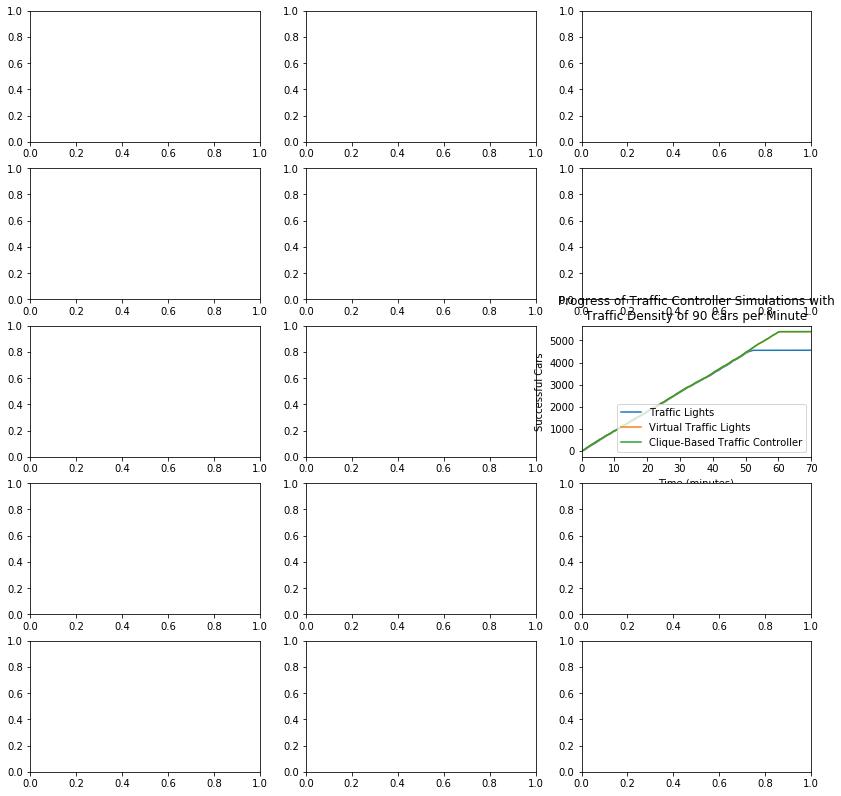

In [3]:
progressTestSuite("111_00")

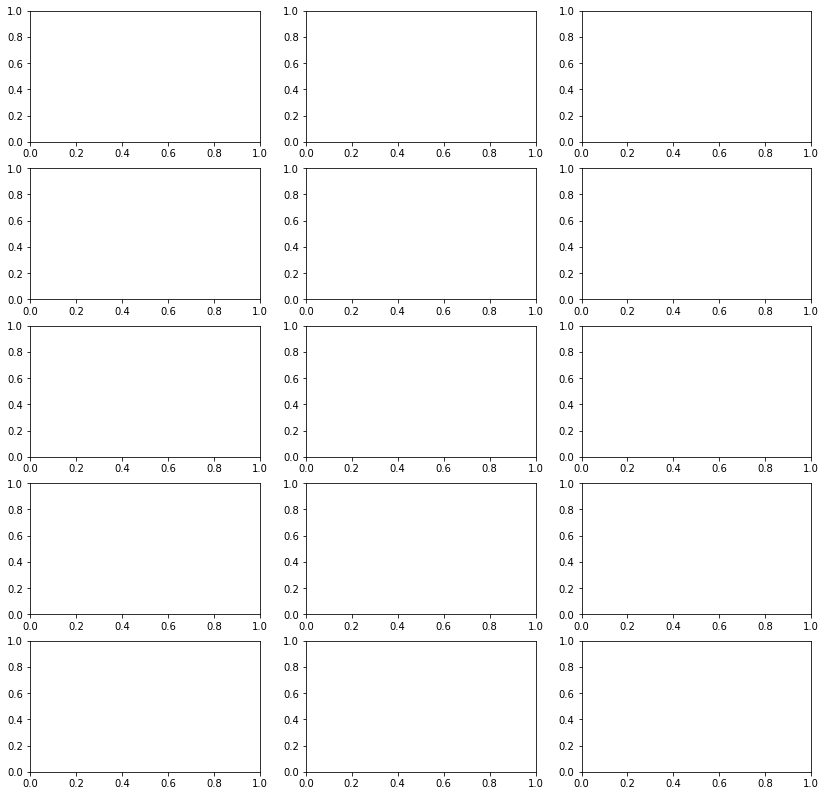

In [4]:
progressTestSuite("111_01")